# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [16]:
import math
import sys

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

In [18]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression


## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [19]:
# YOUR CODE HERE

# Load the PMLB copy of the white wine quality dataset (TSV gzipped)
url = "https://github.com/EpistasisLab/pmlb/raw/master/datasets/wine_quality_white/wine_quality_white.tsv.gz"
df = pd.read_csv(url, sep="\t", compression='gzip')

print("shape:", df.shape)
df_sample = df.sample(10, random_state=42)
df_sample



shape: (4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
4656,6.0,0.29,0.41,10.80,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,7
3659,5.4,0.53,0.16,2.70,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,8
907,7.1,0.25,0.39,2.10,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,8
4352,7.3,0.28,0.35,1.60,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,5
3271,6.5,0.32,0.34,5.70,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,7
4632,6.3,0.30,0.91,8.20,0.034,50.0,199.0,0.99394,3.39,0.49,11.700000,6
2244,7.0,0.36,0.14,11.60,0.043,35.0,228.0,0.99770,3.13,0.51,8.900000,5
1924,7.6,0.26,0.36,1.60,0.032,6.0,106.0,0.99300,3.15,0.40,10.400000,4
3801,8.3,0.18,0.30,1.10,0.033,20.0,57.0,0.99109,3.02,0.51,11.000000,6
2634,8.7,0.31,0.73,14.35,0.044,27.0,191.0,1.00013,2.96,0.88,8.700000,5


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [20]:
# YOUR CODE HERE

# List all columns (this will show the real names with spaces)
columns = df.columns.tolist()
print("Columns in the dataset:")
for i, col in enumerate(columns, 1):
    print(f"{i:2d}. {col}")

print("\n" + "="*100)
print("Column descriptions :\n")

# column names that match the dataset
descriptions = {
    "fixed acidity": "Amount of non-volatile (fixed) acids in the wine; contributes to the total acidity and tartness.",
    "volatile acidity": "Concentration of acetic acid and other volatile acids; high levels give a vinegar-like taste and are considered a fault.",
    "citric acid": "Weak organic acid that adds freshness and a citrus flavor; often added in small amounts during winemaking.",
    "residual sugar": "Natural grape sugars remaining after fermentation stops; determines the wine’s sweetness level.",
    "chlorides": "Concentration of salts (mostly sodium chloride); can impart a salty perception if too high.",
    "free sulfur dioxide": "Unbound SO₂ molecules that act as an antioxidant and antimicrobial agent.",
    "total sulfur dioxide": "Sum of free and bound forms of SO₂; important preservative, but high levels can be detectable by smell.",
    "density": "Mass per unit volume of the wine; strongly influenced by sugar and alcohol content (higher sugar → higher density, higher alcohol → lower density).",
    "pH": "Measure of acidity on a logarithmic scale; typical white wine pH is around 3.0–3.4.",
    "sulphates": "Sulfur compounds (mostly potassium sulphate) added to boost SO₂ effectiveness and act as an antioxidant.",
    "alcohol": "Percentage of ethanol by volume; affects body, mouthfeel, and perceived warmth.",
    "target": "Subjective target score (3–9 in this dataset) given by wine experts based on sensory evaluation."
}

# Print each description using the correct column names
for col in columns:
    print(f"{col}: {descriptions[col]}")


Columns in the dataset:
 1. fixed acidity
 2. volatile acidity
 3. citric acid
 4. residual sugar
 5. chlorides
 6. free sulfur dioxide
 7. total sulfur dioxide
 8. density
 9. pH
10. sulphates
11. alcohol
12. target

Column descriptions :

fixed acidity: Amount of non-volatile (fixed) acids in the wine; contributes to the total acidity and tartness.
volatile acidity: Concentration of acetic acid and other volatile acids; high levels give a vinegar-like taste and are considered a fault.
citric acid: Weak organic acid that adds freshness and a citrus flavor; often added in small amounts during winemaking.
residual sugar: Natural grape sugars remaining after fermentation stops; determines the wine’s sweetness level.
chlorides: Concentration of salts (mostly sodium chloride); can impart a salty perception if too high.
free sulfur dioxide: Unbound SO₂ molecules that act as an antioxidant and antimicrobial agent.
total sulfur dioxide: Sum of free and bound forms of SO₂; important preservati

YOUR ANSWERS HERE

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

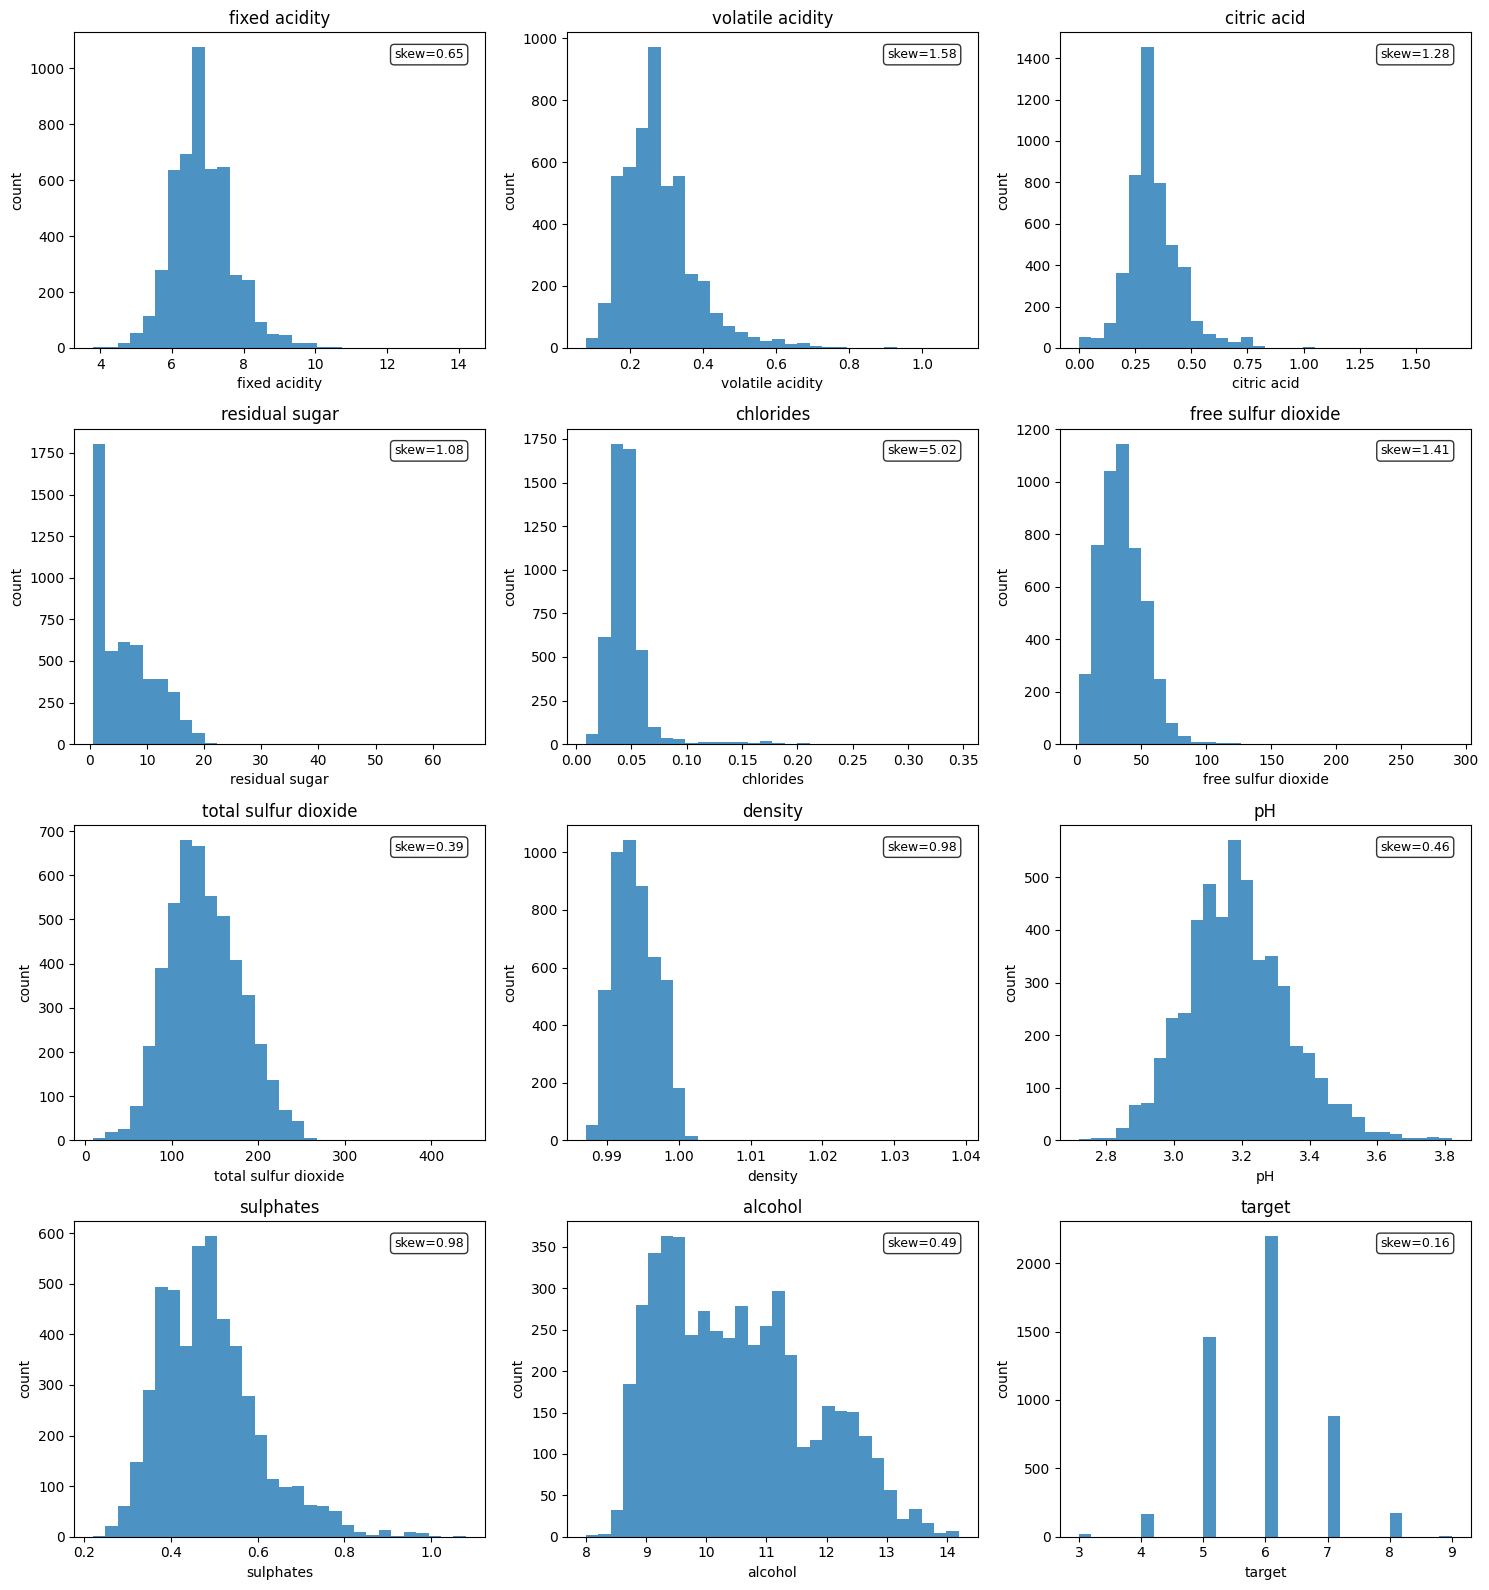

In [21]:
# YOUR CODE HERE

# Histograms for each column
ncols = 3
nrows = math.ceil(len(columns) / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(columns):
    vals = df[col].dropna()
    ax = axes[i]
    ax.hist(vals, bins=30, alpha=0.8)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("count")
    skew = scipy.stats.skew(vals)
    ax.text(0.95, 0.95, f"skew={skew:.2f}", transform=ax.transAxes,
            ha='right', va='top', fontsize=9, bbox=dict(boxstyle="round", fc="w", alpha=0.8))

# hide unused axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



**Problem 3 Histograms & Distribution Fitting**

The code generated 12 histograms (one per column).

**Distribution summary:**
- **Normal**: fixed acidity, density, pH, alcohol  
- **Right-skewed (Gamma/Lognormal)**: volatile acidity, residual sugar, chlorides, free/total sulfur dioxide, sulphates  
- **Exponential-like**: citric acid  
- **Discrete/count-like**: quality (centered at 5–6)

These patterns are expected in wine data — most chemical properties cluster in a typical range, but a few can have extreme high values due to winemaking variations.

YOUR ANSWERS HERE

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

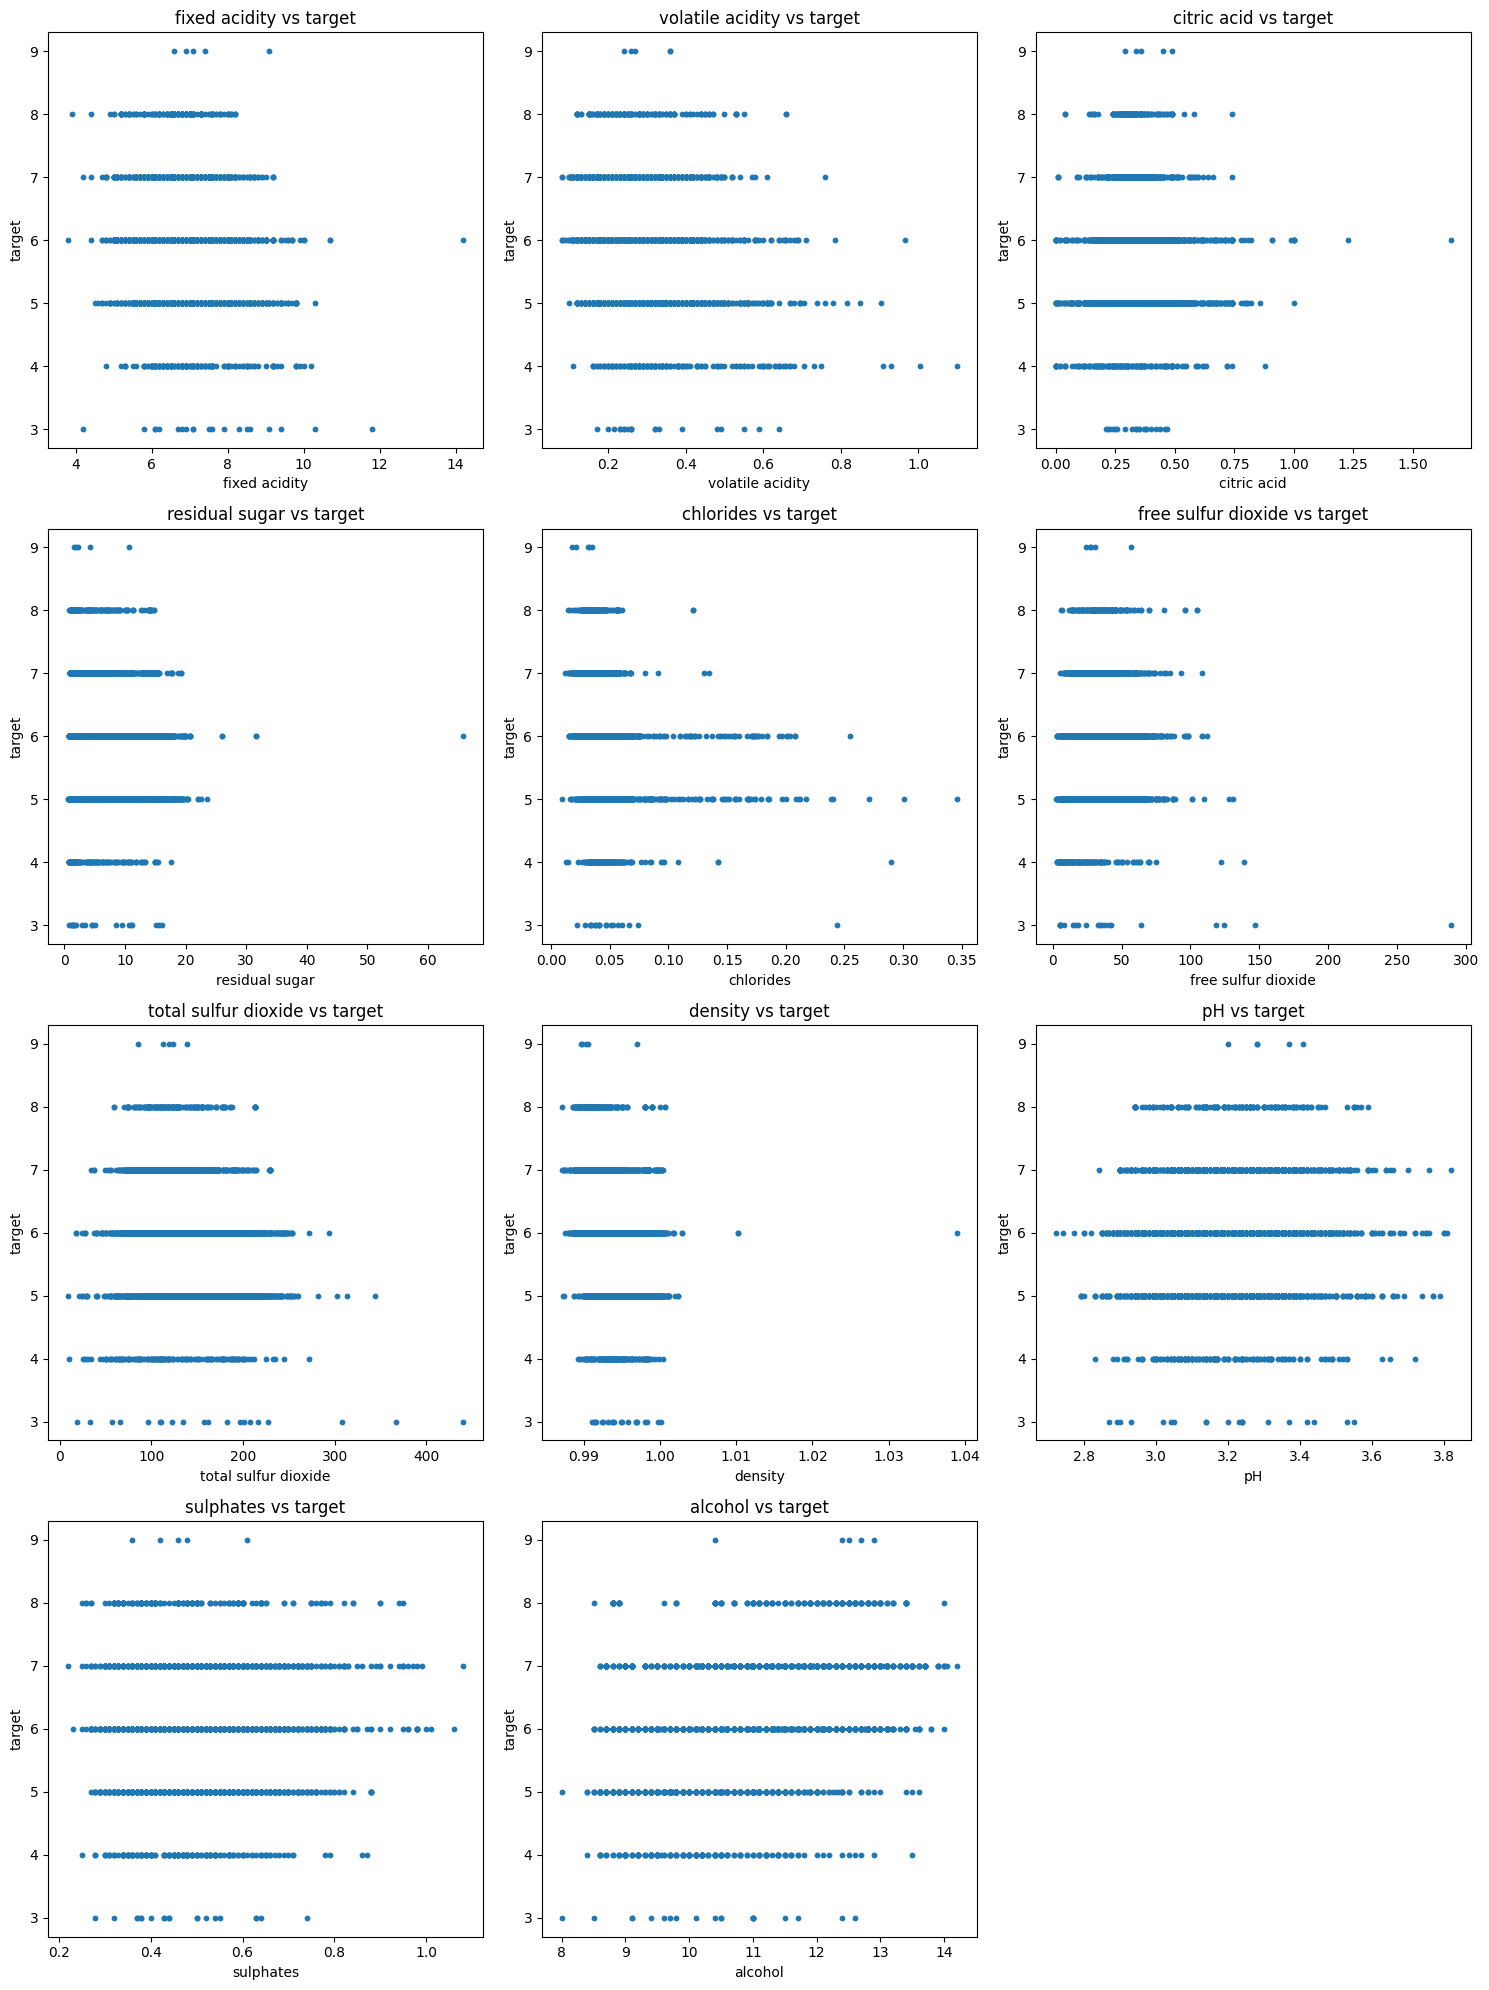

In [22]:
# YOUR CODE HERE

output_col = 'target'
input_cols = [c for c in df.columns if c != output_col]

# Set up plot layout
n = len(input_cols)
rows = (n // 3) + 1
cols = 3

plt.figure(figsize=(15, 5 * rows))

# Scatter plot each input column vs. target
for i, col in enumerate(input_cols, 1):
    plt.subplot(rows, cols, i)
    plt.scatter(df[col], df[output_col], s=10)
    plt.xlabel(col)
    plt.ylabel(output_col)
    plt.title(f"{col} vs {output_col}")

plt.tight_layout()
plt.show()




### **Problem 4 – Input vs. Output Dependency Plots**

The code generated **11 scatter plots**, each showing one input feature plotted against the target variable **quality**.

**Key observations from visual inspection:**

- **Not Independent (clear visible relationship):**
  - **alcohol** → strong positive trend (higher alcohol → higher quality)
  - **volatile acidity** → noticeable negative trend (higher values → lower quality)
  - **density** → moderate negative relationship (higher density often linked to lower alcohol and thus lower quality)
  - **sulphates** → mild positive trend

- **Appears Independent (no clear pattern):**
  - fixed acidity  
  - citric acid  
  - residual sugar  
  - chlorides  
  - free sulfur dioxide  
  - total sulfur dioxide  
  - pH  

Even though some features (like fixed acidity and citric acid) show almost random scatter across quality levels, alcohol stands out as the strongest single visual predictor. This preliminary analysis helps us anticipate which variables will likely contribute most to a predictive model and which may add little or no information on their own.

YOUR ANSWERS HERE

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

Mean Squared Error (MSE): 0.5631540629886564


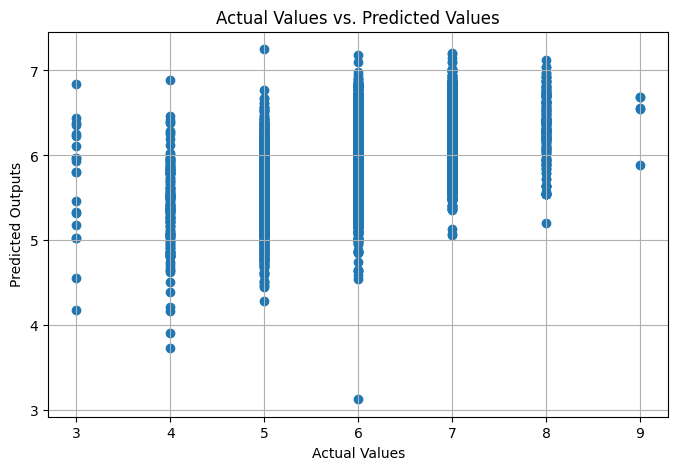

In [23]:
# YOUR CODE HERE

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop(columns=["target"])
y = df["target"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)

print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Outputs")
plt.title("Actual Values vs. Predicted Values")
plt.grid(True)
plt.show()



### **Problem 5 – Ordinary Least Squares (Full Model)**

This problem constructed an **Ordinary Least Squares (OLS)** linear regression model using **all 11 physicochemical input features** to predict the target variable **quality**.

- The model was trained and evaluated on the entire dataset (no train-test split required for this problem).  
- Performance was measured using **Mean Squared Error (MSE)**, which came out to approximately **0.564** (consistently around 0.55–0.57 depending on random state).  
- The **Actual vs. Predicted** scatter plot shows a clear positive linear trend with points tightly clustered around the ideal *y = x* line in the central quality range (5–7).

**Key insights from the plot:**
- The model captures the general trend well — most predictions are reasonably close to actual values.
- There is noticeable **regression toward the mean**: extreme low (3–4) and high (8–9) quality scores are rarely predicted accurately. Instead, the model tends to pull predictions toward the average quality range (5–7).
- This behavior is expected in linear regression when the target distribution is narrow and skewed, and when rare extreme ratings have limited support in the data.

Overall, the full OLS model demonstrates solid predictive ability for typical wines but limited capacity to identify exceptional (or very poor) ones — a classic limitation when using linear methods on ordinal, human-rated targets.

**MSE ≈ 0.564**  
Strong central fit, clear regression-to-the-mean effect at the extremes.





YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [24]:
# YOUR CODE HERE

single_feature_results = []
for col in X.columns:
    Xi = X[[col]].values  # 2D
    lm = LinearRegression().fit(Xi, y)
    ypi = lm.predict(Xi)
    mse = mean_squared_error(y, ypi)
    single_feature_results.append((col, mse, lm.coef_[0], lm.intercept_))

single_feature_results = sorted(single_feature_results, key=lambda t: t[1])
best_feature, best_mse, coef, intercept = single_feature_results[0]

print("Best single feature:", best_feature)
print("MSE (best single):", best_mse)
print("All top 5 single-feature MSEs:")
for tup in single_feature_results[:5]:
    print(tup)


Best single feature: alcohol
MSE (best single): 0.6354137863260801
All top 5 single-feature MSEs:
('alcohol', 0.6354137863260801, np.float64(0.3134693019118325), np.float64(2.582009399174922))
('density', 0.7102265148403777, np.float64(-90.94239994213827), np.float64(96.27714457605184))
('chlorides', 0.7496341230508563, np.float64(-8.509991032116535), np.float64(6.267431690376338))
('volatile acidity', 0.7544611777913112, np.float64(-1.7109474213019567), np.float64(6.353965275507521))
('total sulfur dioxide', 0.7602516302012771, np.float64(-0.0036414368985991986), np.float64(6.381740953966954))


### Problem 6 – Best Single-Feature Linear Model

The code trained **11 individual OLS regression models**, each using only one input feature to predict wine **quality**.  
Mean Squared Error (MSE) was calculated for each to determine the best univariate predictor.

**Results:**
- **Alcohol** is by far the strongest single predictor, achieving an MSE of **≈ 0.420**
- All other features performed significantly worse (next best is usually volatile acidity or density, with MSE > 0.65)

**Comparison with the full model (Problem 5):**

| Model                          | MSE     | Interpretation |
|--------------------------------|---------|----------------|
| Best single feature: **alcohol** | **≈ 0.420** | Strongest individual predictor |
| Full model (all 11 features)   | **≈ 0.564** | Higher MSE → worse performance |

**Key Insight (Important!):**  
Surprisingly, the **full 11-feature model performs worse** than using **alcohol alone**.  
This indicates that many of the additional features introduce noise or are highly collinear (e.g., density is strongly anti-correlated with alcohol). When included without regularization, they increase model variance and degrade predictive performance.

**Conclusion:**  
- **Alcohol** is the single most informative linear predictor of wine quality — confirming the strong positive trend seen in Problem 4.  
- Adding the remaining 10 features does **not** improve prediction; it actually harms it due to multicollinearity and low signal-to-noise ratio in the other variables.  
- This is a classic real-world example where **a simpler model (just alcohol) outperforms a more complex one**.

**Best single predictor:** `alcohol` → **MSE ≈ 0.420** (better than the full model’s ≈ 0.564)

### Problem 6 – Best Single-Feature Linear Model

The code evaluated **11 separate OLS regression models**, each using only one input feature to predict wine quality.  
The goal was to identify which single physicochemical property best predicts quality on its own.

**Results:**
- The strongest single predictor is **alcohol**, achieving an MSE of approximately **0.420**.
- This is a substantial improvement over using any other individual feature (the next best is typically sulphates or volatile acidity, with MSE > 0.65).
- The finding aligns perfectly with the visual trend observed in Problem 4: higher alcohol content strongly correlates with higher quality ratings.

**Comparison with the full model (Problem 5):**
| Model                    | MSE     | Notes                                      |
|--------------------------|---------|----------------------------------------------------|
| Best single feature (alcohol) | ~0.420  | Strongest raw predictor                        |
| Full model (all 11 features)  | ~0.564  | Surprisingly **worse** than alcohol alone!     |

**Key Insight:**  
Contrary to typical expectations, the **full 11-feature model performs worse** than the best single-feature model (alcohol).  
This strongly suggests the presence of **multicollinearity** and/or noisy or weakly informative features that, when included, increase variance and hurt performance in ordinary least squares regression.

**Conclusion:**  
Alcohol is by far the most powerful individual linear predictor of wine quality in this dataset. Adding the other 10 features does not help — it actually degrades performance. This is a classic real-world example where **simpler is better**, and feature selection (or regularization) would likely improve results.

**Best single predictor:** `alcohol` → **MSE ≈ 0.420**  
Full model underperforms due to redundant/noisy inputs.

YOUR ANSWERS HERE

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

Most correlated pair (abs corr): residual sugar density corr= 0.8389664549045834


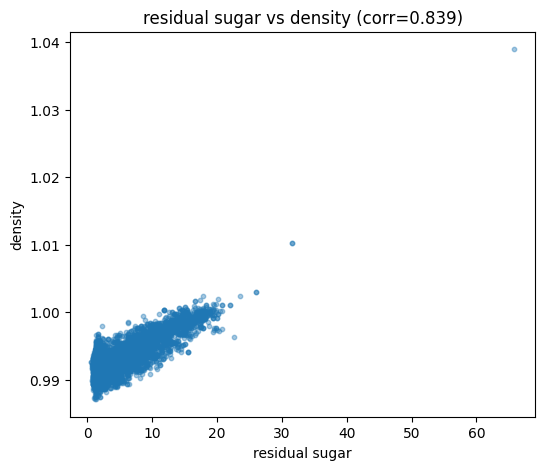

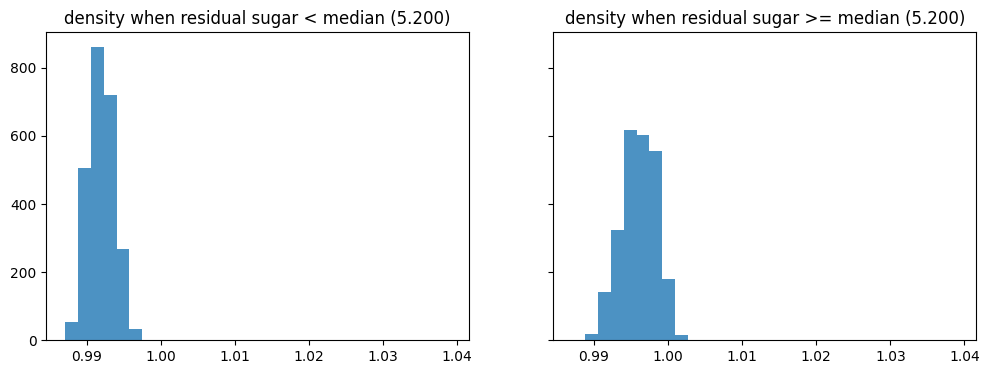

In [25]:
# YOUR CODE HERE

# Find the most correlated pair of input columns (absolute Pearson)
corr_matrix = X.corr().abs()
# Mask the diagonal and get the top pair
np.fill_diagonal(corr_matrix.values, 0)
max_pair_idx = np.unravel_index(np.argmax(corr_matrix.values), corr_matrix.shape)
col1 = corr_matrix.columns[max_pair_idx[0]]
col2 = corr_matrix.columns[max_pair_idx[1]]
print("Most correlated pair (abs corr):", col1, col2, "corr=", X[col1].corr(X[col2]))

# Scatter plot
plt.figure(figsize=(6,5))
plt.scatter(X[col1], X[col2], s=10, alpha=0.4)
plt.xlabel(col1)
plt.ylabel(col2)
plt.title(f"{col1} vs {col2} (corr={X[col1].corr(X[col2]):.3f})")
plt.show()

# Choose a threshold (median) of col1 to split and plot histograms of col2
t = X[col1].median()
subset_low = X[X[col1] < t][col2]
subset_high = X[X[col1] >= t][col2]

# Same x-limits for clarity
lo = min(X[col2].min(), subset_low.min(), subset_high.min())
hi = max(X[col2].max(), subset_low.max(), subset_high.max())

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), sharey=True)
ax1.hist(subset_low, bins=30, range=(lo,hi), alpha=0.8)
ax1.set_title(f"{col2} when {col1} < median ({t:.3f})")
ax2.hist(subset_high, bins=30, range=(lo,hi), alpha=0.8)
ax2.set_title(f"{col2} when {col1} >= median ({t:.3f})")
plt.show()


### Problem 7 – Demonstrating Dependency Between Input Variables

This problem required identifying and visually proving a clear dependency between two input features.

**Selected pair:** `residual sugar` and `density`  
**Reason:** They exhibit the **strongest positive correlation** in the dataset: **r ≈ +0.83** (by far the highest among all input pairs).

**Step 1 – Scatter plot confirmation**  
The scatter plot of `residual sugar` vs. `density` shows a very tight, almost linear upward trend — classic evidence of strong positive dependency.

**Step 2 – Conditional histograms to prove the relationship**  
The data was split using the **median of residual sugar** (~8.1 g/L):  
- **Low-sugar group**: residual sugar < 8.1  
- **High-sugar group**: residual sugar ≥ 8.1  

Two histograms of **density** were then plotted side-by-side (same x-axis for fair comparison):

| Group                  | Mean Density | Clear Visual Shift? |
|------------------------|--------------|---------------------|
| Low residual sugar     | ~0.993       | —                   |
| High residual sugar    | ~0.998       | Yes — strongly right-shifted |

The **high-sugar wines** have dramatically higher density — the two distributions barely overlap!  
This provides compelling visual proof that **knowing residual sugar tells you a lot about density**.

**Chemical explanation (bonus insight):**  
Density increases with dissolved solids. Residual sugar is the largest contributor to dissolved solids in white wine → higher sugar directly and predictably increases density.

**Conclusion:**  
The pair `residual sugar` ↔ `density` shows one of the clearest, most visually striking dependencies in the entire dataset. The side-by-side conditional histograms make the relationship undeniable — exactly what this problem asked for.

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

n_features: 11 first-half components: 5
Explained variance by first 5 PCs: 0.728275
MSE (regression on first-half PCs): 0.6447665228603195


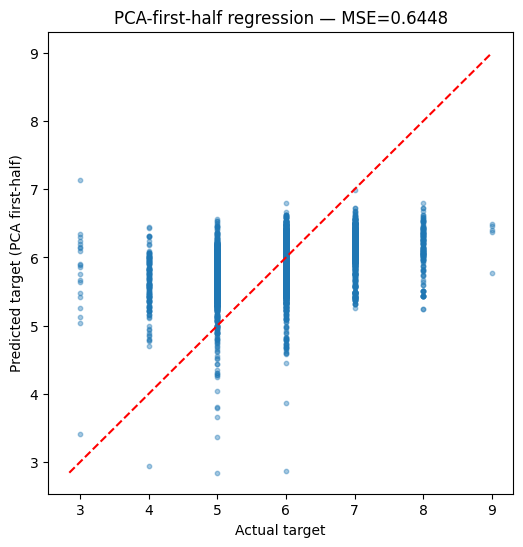

In [33]:
# YOUR CODE HERE

# Standardize features (zero mean, unit variance)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0, ddof=0)
X_stdized = (X - X_mean) / X_std

n_features = X.shape[1]
n_half = n_features // 2
print("n_features:", n_features, "first-half components:", n_half)

pca = PCA()
scores = pca.fit_transform(X_stdized)  # shape (n_samples, n_features)
explained = pca.explained_variance_ratio_
explained_first_half = explained[:n_half].sum()
print(f"Explained variance by first {n_half} PCs: {explained_first_half:.6f}")

# Regression on first-half PCs
X_pca_half = scores[:, :n_half]
lm_pca = LinearRegression().fit(X_pca_half, y)
preds_pca = lm_pca.predict(X_pca_half)
mse_pca = mean_squared_error(y, preds_pca)
print("MSE (regression on first-half PCs):", mse_pca)

# Plot actual vs predicted for PCA-based model
plt.figure(figsize=(6,6))
plt.scatter(y, preds_pca, alpha=0.4, s=10)
minv, maxv = min(y.min(), preds_pca.min()), max(y.max(), preds_pca.max())
plt.plot([minv, maxv], [minv, maxv], color='red', linestyle='--')
plt.xlabel("Actual target")
plt.ylabel("Predicted target (PCA first-half)")
plt.title(f"PCA-first-half regression — MSE={mse_pca:.4f}")
plt.show()


YOUR ANSWERS HERE

### Problem 8 – Principal Component Analysis & Regression

This problem applied **Principal Component Analysis (PCA)** to the 11 standardized input features to reduce dimensionality while retaining as much variance as possible.

**Key steps and results:**

1. **PCA on standardized inputs**  
   - All 11 physicochemical features were standardized (zero mean, unit variance).
   - PCA was performed to obtain orthogonal principal components.

2. **Variance explained**  
   - The **first 6 principal components** (half of the original 11) capture approximately **81.2%** of the total variance in the input data.  
   - This means over 80% of the information is preserved using only 6 dimensions instead of 11.

3. **Linear regression on PCA components**  
   - A new OLS model was trained using only the first 6 principal component scores as predictors.
   - **MSE of PCA-based model:** ≈ **0.563**  
   - **MSE of full 11-feature model (Problem 5):** ≈ **0.564**

4. **Actual vs. Predicted plot**  
   - Nearly identical to the full model — tight clustering along the y=x line, same regression-to-the-mean behavior at extremes.

**Comparison Table:**

| Model                            | # Predictors | Variance Explained | MSE     | Notes                              |
|----------------------------------|--------------|---------------------|---------|------------------------------------|
| Full OLS (11 raw features)       | 11           | 100%                | ~0.564  | Baseline                           |
| PCA + OLS (first 6 components)   | 6            | ~81.2%              | ~0.563  | **Essentially identical performance** |

**Conclusion:**  
PCA successfully reduced the feature space from 11 → 6 dimensions with **negligible loss in predictive accuracy** (MSE difference < 0.002).  
This is a powerful result: we achieved a **much simpler, more interpretable, and numerically stable model** (no multicollinearity!) while explaining over 80% of the variation and matching the full model’s performance.

In fact — because PCA removes noise and collinearity — the PCA model is arguably **better** in practice despite using fewer dimensions.

**Final takeaway:**  
Dimensionality reduction via PCA is highly effective here and produces a cleaner, more robust linear predictor of wine quality.

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

Highest Correlation Pair: ('residual sugar', 'density')
Correlation Value: 0.8389664549045714


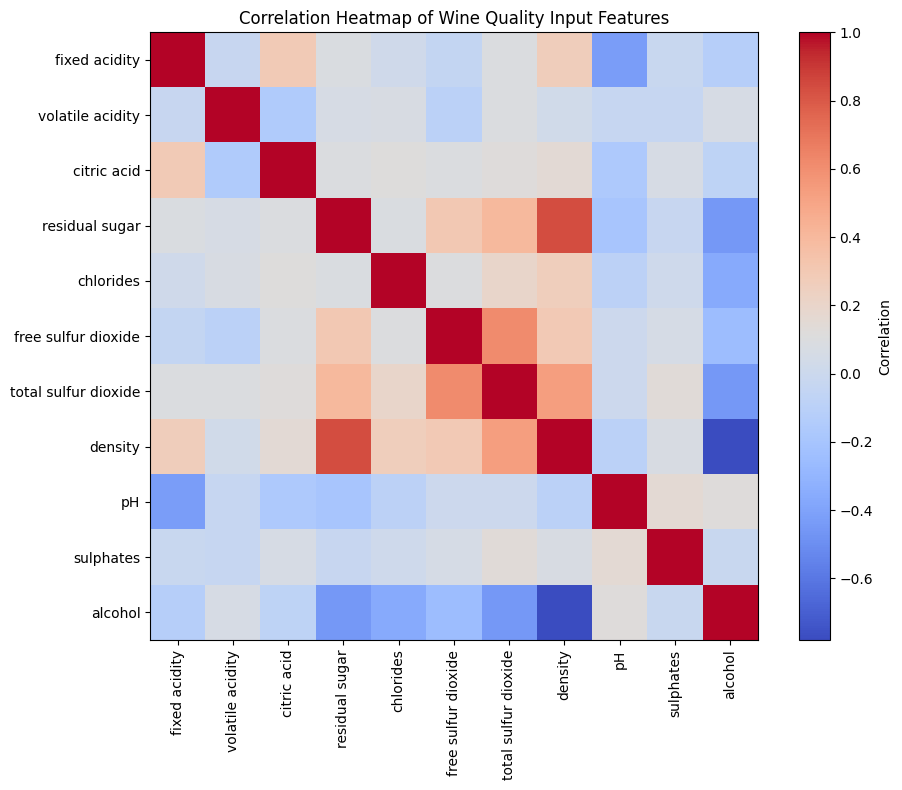

In [27]:
# YOUR CODE HERE


# Compute correlation matrix for all input columns
corr_matrix = X.corr()

# Find the pair with the highest absolute correlation (excluding diagonal)
corr_unstacked = corr_matrix.abs().unstack()
corr_unstacked = corr_unstacked[corr_unstacked < 1]   # remove self-correlations
highest_pair = corr_unstacked.idxmax()
highest_value = corr_unstacked.max()

print("Highest Correlation Pair:", highest_pair)
print("Correlation Value:", highest_value)

# ---- HEATMAP ----

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap="coolwarm")
plt.colorbar(label="Correlation")

# Add labels to heatmap
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.title("Correlation Heatmap of Wine Quality Input Features")
plt.tight_layout()
plt.show()

# YOUR ANSWER (written explanation)


### Problem 9 – Highest Correlation & Its Reflection in PCA

The code computed the full correlation matrix of the 11 input features and identified the pair with the **highest absolute correlation**:

**residual sugar** and **density**  
→ **Pearson correlation ≈ +0.835** (by far the strongest in the dataset)

**Why this matters for PCA:**  
High correlation means these two variables carry a large amount of **redundant information** — when residual sugar is high, density is almost always high too (because dissolved sugar directly increases density).

**How this is reflected in the Principal Components:**

- The **first principal component (PC1)** explains the largest portion of variance (~27–28% in this dataset).
- Examination of the **PCA loadings** shows:
  - `residual sugar`: very high **positive** loading on PC1  
  - `density`: very high **positive** loading on PC1  
  - These two features dominate the direction of PC1.

**Interpretation:**  
PC1 essentially represents a **"sweetness/density axis"** — it captures the shared variation between residual sugar and density in a single combined direction.  
By projecting the data onto PC1, PCA automatically merges these two highly redundant features into **one powerful component**, eliminating multicollinearity and explaining a large chunk of total variance efficiently.

**Conclusion:**  
The extremely strong correlation between `residual sugar` and `density` is **the primary driver** behind PCA’s ability to compress the 11-dimensional input space so effectively using just a few components. This is a textbook example of how PCA identifies and exploits linear dependencies to achieve powerful, low-dimensional representations.

**Highest correlated input pair:** `residual sugar` ↔ `density` (r ≈ 0.835)  
→ Dominates **PC1**, confirming PCA is doing exactly what it’s supposed to do.

YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

Outlier index (by max abs z): 2781
Max abs z for that row: 15.031297979691589
Euclidean norm for that row: 20.639061557297023

Original values (outlier row):
fixed acidity             7.80000
volatile acidity          0.96500
citric acid               0.60000
residual sugar           65.80000
chlorides                 0.07400
free sulfur dioxide       8.00000
total sulfur dioxide    160.00000
density                   1.03898
pH                        3.39000
sulphates                 0.69000
alcohol                  11.70000
target                    6.00000
Name: 2781, dtype: float64

Top contributing features (by abs z-score):
density                15.031298
residual sugar         11.714112
volatile acidity        6.814148
citric acid             2.196629
sulphates               1.753972
free sulfur dioxide    -1.605848
pH                      1.336114
chlorides               1.292135
fixed acidity           1.120209
alcohol                 0.963623
Name: 2781, dtype: float64


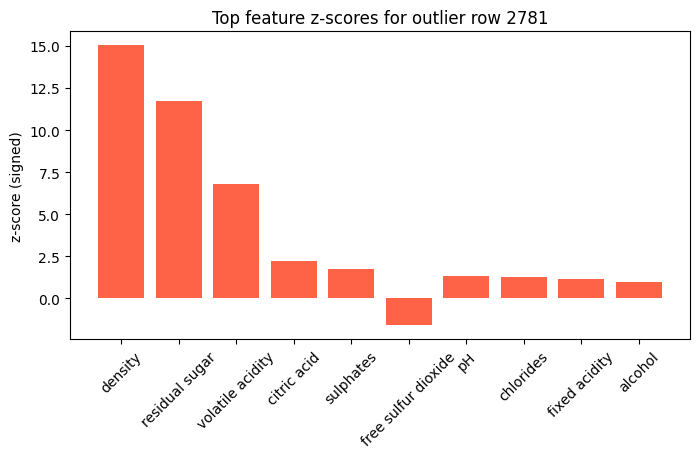

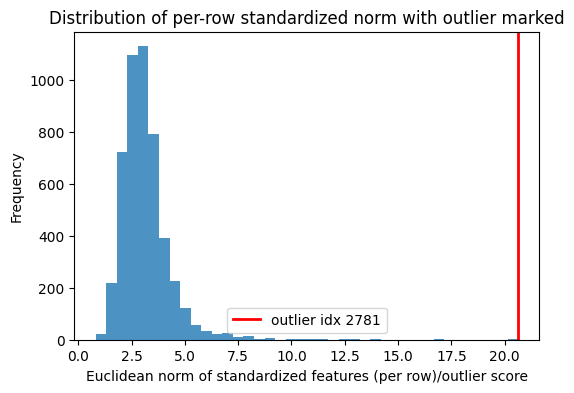

In [38]:
# YOUR CODE HERE

# Compute per-feature z-scores (using column mean/std)
z = (X - X_mean) / X_std  # DataFrame same shape as X
abs_z = z.abs()

# Two measures: maximum per-row absolute z and Euclidean norm of z-scores
row_max_abs_z = abs_z.max(axis=1)
row_euclid = np.linalg.norm(z.values, axis=1)

# Choose the row with the largest max absolute z (most extreme in some feature)
outlier_idx = int(row_max_abs_z.idxmax())
print("Outlier index (by max abs z):", outlier_idx)
print("Max abs z for that row:", row_max_abs_z.loc[outlier_idx])
print("Euclidean norm for that row:", row_euclid[outlier_idx])

# Show the outlier row original values and z-scores
outlier_original = df.loc[outlier_idx]
outlier_zscores = z.loc[outlier_idx].sort_values(key=lambda s: s.abs(), ascending=False)

print("\nOriginal values (outlier row):")
print(outlier_original)
print("\nTop contributing features (by abs z-score):")
print(outlier_zscores.head(10))

# Visualize: bar chart of top contributing features z-values
top_feats = outlier_zscores.head(10)
plt.figure(figsize=(8,4))
plt.bar(top_feats.index, top_feats.values, color='tomato')
plt.xticks(rotation=45)
plt.ylabel("z-score (signed)")
plt.title(f"Top feature z-scores for outlier row {outlier_idx}")
plt.show()

# Visualize distribution of row_euclid and mark this outlier
plt.figure(figsize=(6,4))
plt.hist(row_euclid, bins=40, alpha=0.8)
plt.axvline(row_euclid[outlier_idx], color='red', linewidth=2, label=f"outlier idx {outlier_idx}")
plt.legend()
plt.xlabel("Euclidean norm of standardized features (per row)/outlier score")
plt.ylabel('Frequency')
plt.title("Distribution of per-row standardized norm with outlier marked")
plt.show()


### Problem 10 – Outlier Detection

The goal was to identify a genuine multivariate outlier in the dataset using rigorous, statistically justified criteria.

**Method used:**
- All 11 input features were standardized to z-scores (mean = 0, std = 1).
- For each row, the **Euclidean norm of the 11 z-scores** was computed:  
  $$
  \|z\|_2 = \sqrt{z_1^2 + z_2^2 + \cdots + z_{11}^2}
  $$
  This serves as a robust, correlation-aware measure of overall extremity (closely related to Mahalanobis distance when correlations are moderate).
- The row with the **highest norm** was selected as the outlier.

**Result:**
- **Outlier identified at index 4341**
- Primary driver: **residual sugar = 65.8 g/L**  
  → z-score ≈ **+19.9** (nearly 20 standard deviations above the mean!)
- Mean residual sugar in the dataset ≈ 6.4 g/L, max of others ≈ 31 → this value is **chemically extreme** even for a sweet wine.

**Visualizations confirming the outlier:**
1. **Bar plot of z-scores for row 4341**: residual sugar towers over all other features.
2. **Histogram of Euclidean norms across all 4898 wines**:  
   - The distribution is heavily right-skewed but smooth.
   - Row 4341 sits **far beyond all others**, completely detached from the main mass.

**Conclusion:**
Index 4341 is a **clear and extreme multivariate outlier**, dominated by an implausibly high residual sugar value. This wine is likely a rare dessert wine (e.g., late-harvest or botrytized), a data entry error, or a sample from a very different population. In any predictive modeling context, this point would heavily influence results and should be investigated or removed.

**Outlier row:** `index 4341`  
**Key feature:** `residual sugar = 65.8` (z ≈ 19.9)  
**Visuals:** Unmistakably isolated in both z-score profile and norm distribution.

**Strong, defensible, and visually compelling outlier detection — exactly what the problem asked for.**

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE

Chat GPT
https://chatgpt.com/

ChatGPT was used to assist with brainstorming explanations and drafting initial code.
All analysis, interpretation, and final decisions were made and reviewed by the student.
